
- https://github.com/pmsipilot/docker-compose-viz

Needing Docker is clunky, would be good to take [draw-compose](https://github.com/Alexis-benoist/draw-compose) and change it to build a graph in the same style as `docker-compose-viz`.


In [20]:
import os
import requests
from IPython.display import SVG, display
from myst_nb import glue

def render_docker_stack(compose_url, name):
    in_file = f"stacks/{name}.yml"
    if not os.path.exists(in_file):
        r = requests.get(compose_url, allow_redirects=True)
        open(in_file, 'wb').write(r.content)
    out_file = f"stacks/{name}.svg"
    os.system(f"docker run --rm -v $(pwd):/input pmsipilot/docker-compose-viz render -m graphviz -f --no-volumes -o {out_file} {in_file}")
    glue(f"stack_plot_{name}", SVG(out_file))

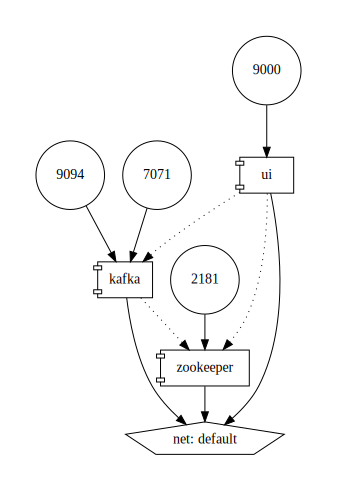

In [22]:
render_docker_stack(
    'https://raw.githubusercontent.com/ukwa/ukwa-services/master/ingest/fc/fc-kafka/docker-compose.yml',
    'fc_kafka'
)

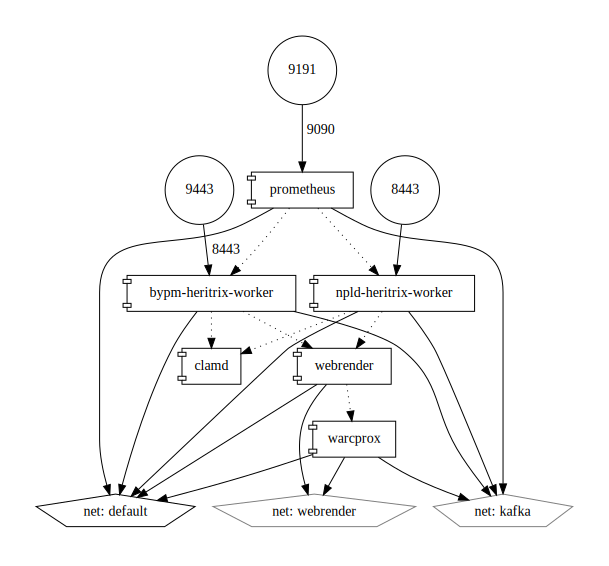

In [26]:
render_docker_stack(
    'https://raw.githubusercontent.com/ukwa/ukwa-services/master/ingest/fc/fc-crawl/docker-compose.yml',
    'fc_crawl'
)